# Assignment 3 - Ridge and Lasso Regression 

### We are going to predict baseball salaries from performance data.  

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


The task in this assignment is to build models of Baseball players (only fielding players, not pitchers) salaries based on statistics.  These are real data from MLB.  
Why is this an important task - if you are a player learn what gets you paid! 
I did a little bit of clean up of the csv as we read it in. 

In [2]:
df = pd.read_csv('Hitters.csv', index_col=0)
df.index.name = 'Player'
df.info()
#take out new league vairable

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

The first 7 variables are from the previous season.  The variables starting with a C are career statistics.  PutOuts, Assists, and Errors are also single season statistics.  Salary is their salary.  League, Division, and NewLeague reflect where they play. 

Always deal with problems.  Non-null count tells you how many entries you have that are not missing values.  `Salary` clearly shows missing values. 

In [ ]:
#Lets preemptively get rid of garbage. 
df=df.dropna()
df.info()


['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary']
<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AtBat     263 non-null    int64  
 1   Hits      263 non-null    int64  
 2   HmRun     263 non-null    int64  
 3   Runs      263 non-null    int64  
 4   RBI       263 non-null    int64  
 5   Walks     263 non-null    int64  
 6   Years     263 non-null    int64  
 7   CAtBat    263 non-null    int64  
 8   CHits     263 non-null    int64  
 9   CHmRun    263 non-null    int64  
 10  CRuns     263 non-null    int64  
 11  CRBI      263 non-null    int64  
 12  CWalks    263 non-null    int64  
 13  League    263 non-null    object 
 14  Division  263 non-null    object 
 15  PutOuts   263 non-null    int64

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


1.  Encode and organize the data

There are 4 variables that are objects, i.e., string -  League, Division, and NewLeague.   You need to convert these into numeric variables, for example by using `get_dummies`.  

Take a moment to look at the values contained in each of these, and then make a strategy of how you want to encode them.  Keep in mind that each of them takes only two values, and you dont want to create variables that are redundant.  

NewLeague indicates the team the league is in for the new season.  Very few players change leagues, so there is not much information there.  You should remove it from the dataframe, and I assumed you did in the rest of this assignment.

The response variable is Salary.  The other variables are your predictors.  

In [ ]:
df = pd.get_dummies(df, columns=['League', 'Division'], drop_first = True)


2.  Its useful to do some exploratory data analysis.  
    First, visualize just the single season statistics. The first 7 columns in the dataframe from contain the single season statistics.  A pairplot would be a useful idea. You should immediately see that some of these variables are highly correlated. 

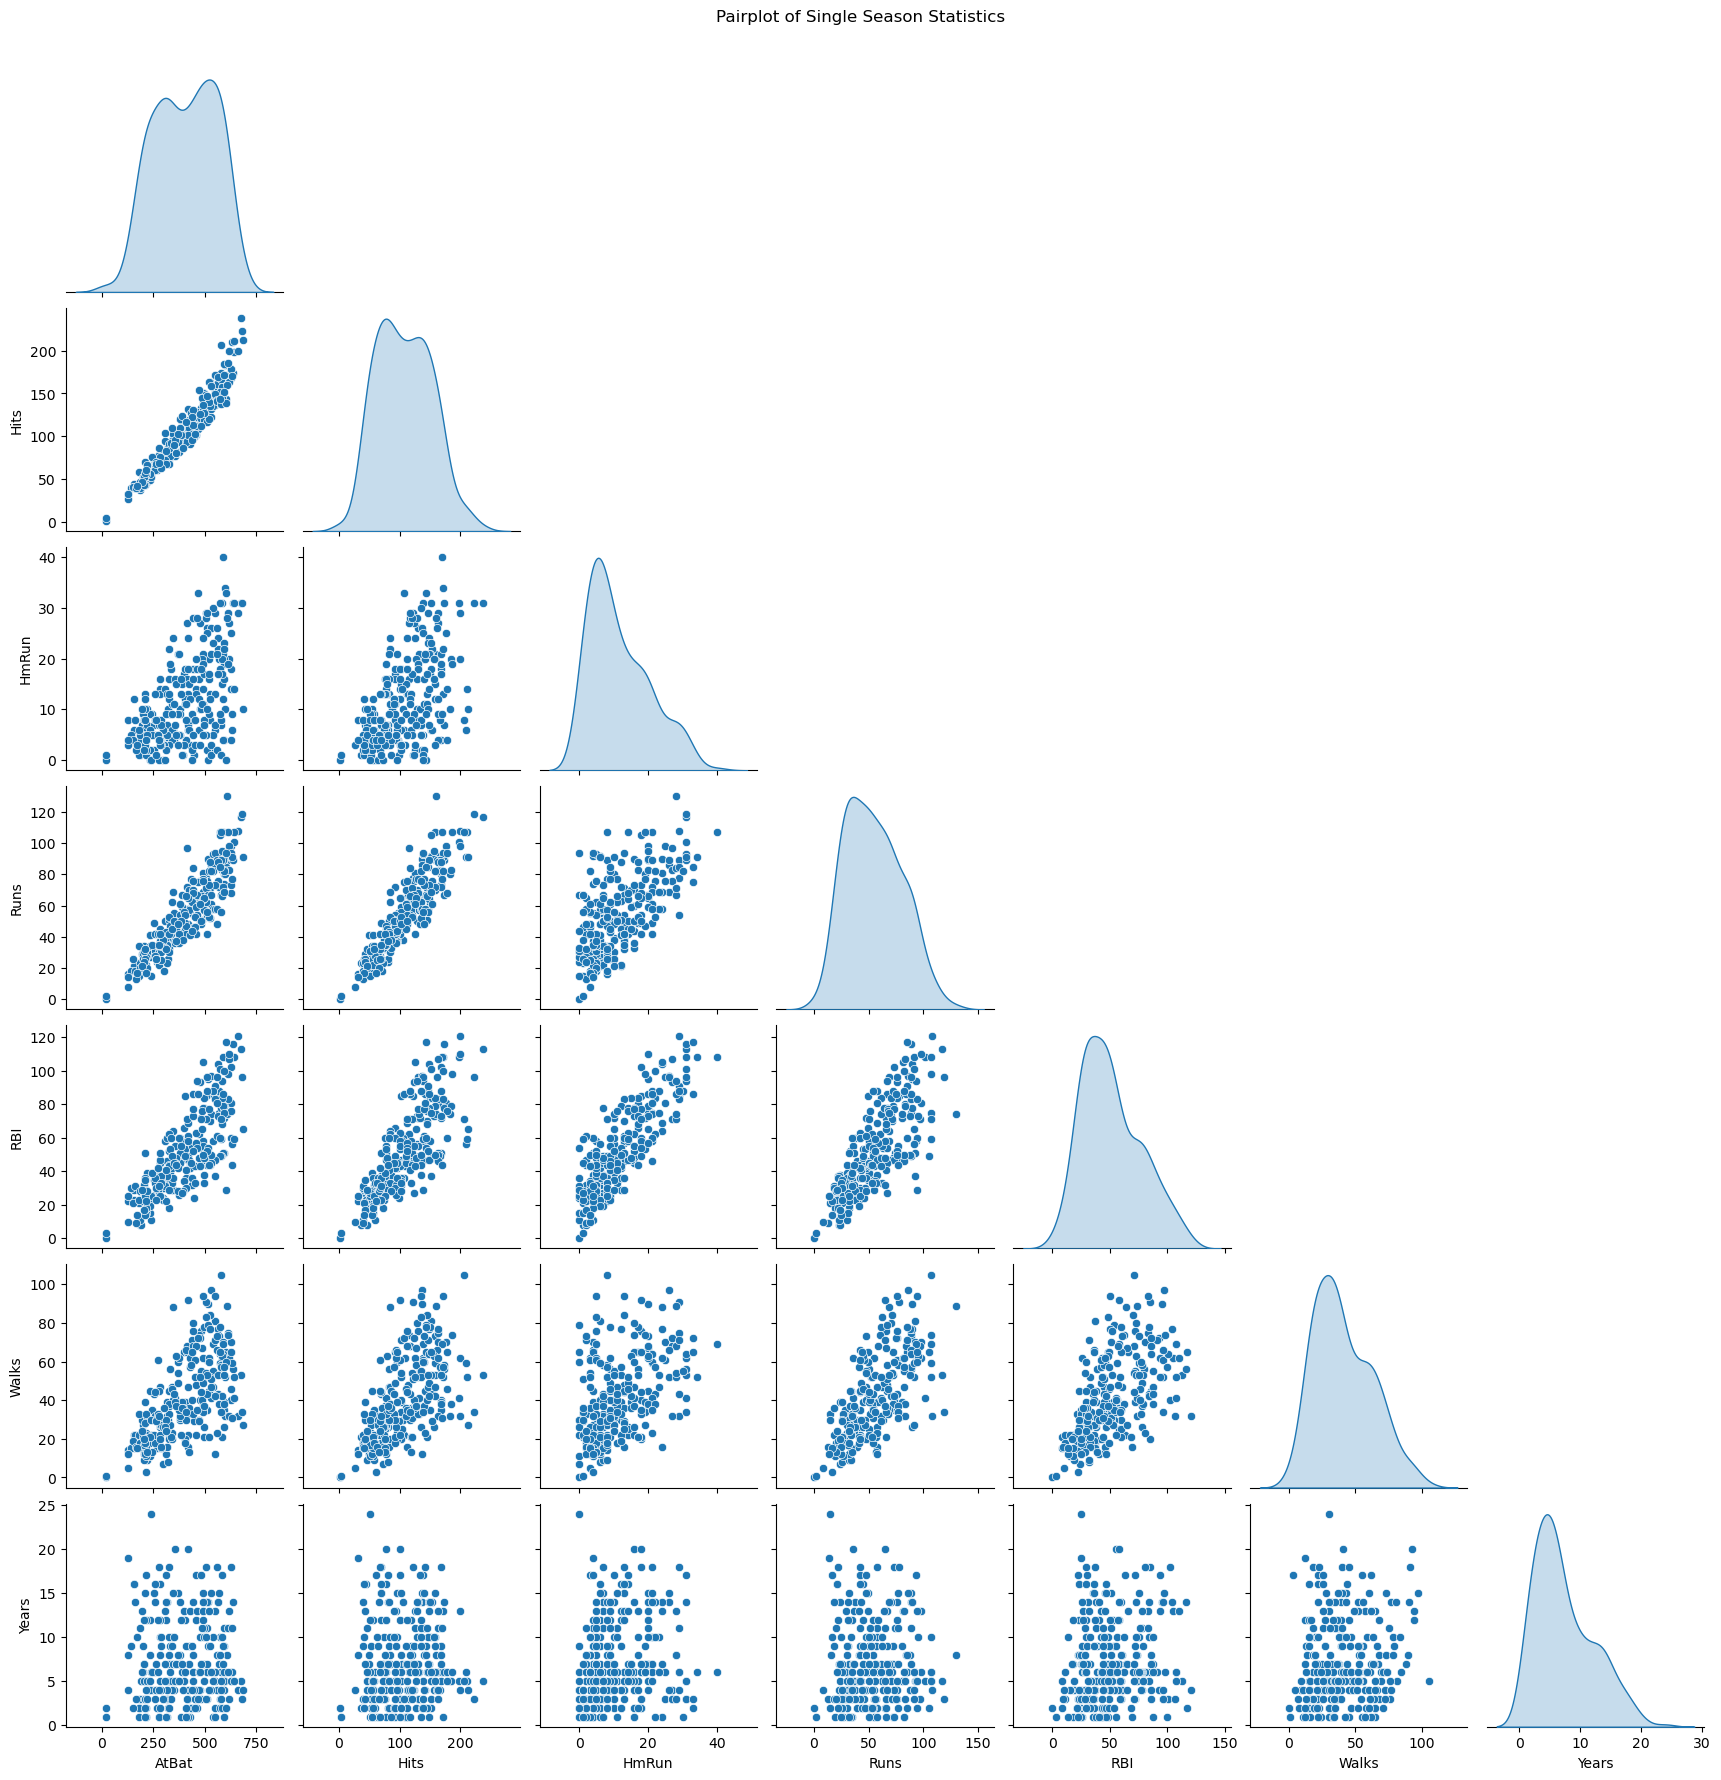

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# The first 7 columns are the single-season statistics
single_season = df.iloc[:, 0:7]

# Create a pairplot to visualize relationships among these variables
sns.pairplot(single_season, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Single Season Statistics', y=1.02)
plt.show()


Make a heatmap showing the correlations between all the variables.  This will not work unless you have converted it all into dummy variables 

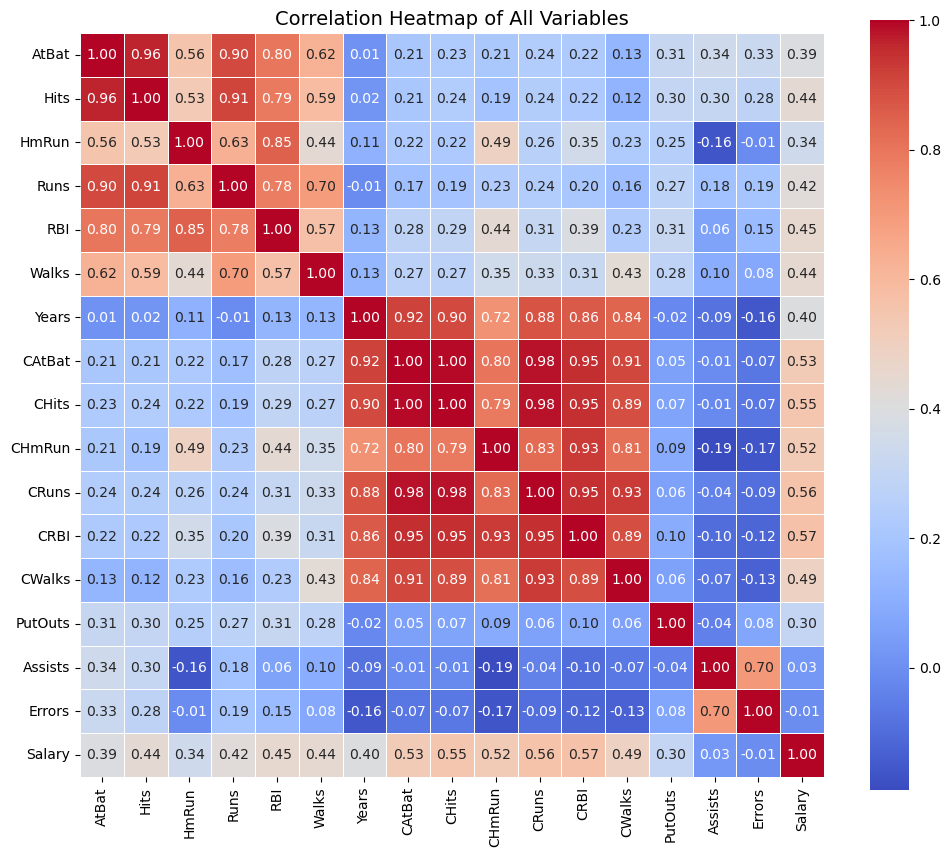

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # format numbers with 2 decimals
    cmap='coolwarm',     # color scheme
    square=True,
    linewidths=0.5
)

plt.title('Correlation Heatmap of All Variables', fontsize=14)
plt.show()


Write down your impression of the data in the box below   What variables are highly correlated?  Are the single season statistics and career statistics highly correlated? What are some candidate variables that could explain salary? 

In the heatmap data, you can see the correlation between the variables in the middle (years, CAtBat, CHits, CHmRun, CRuns, CRBI, and CWalks). Theres also another correlation in the top left corner which is not as highly correlated as the box in the middle with the variables(AtBat, Hits, HmRun, Runs, RBI, and walks). The correlation between these variables shows that the career stats are higher correlated than the season stats. The career stats have a higher correlation to the salary than the season stats and the variables that matter the most when determining the salary are CRuns,CHits, and CAtBat.

3.  Separate the data into test (25%) and training sets.  Also separate the response variable (salary) into a separate variable y, and the predictors into a separate variable X.  Use StandardScaler to scale the predictors.   Whether you choose the scale the response variable is somewhat arbitrary.  If you dont, you will get a model that predicts actual salaries and has an intercept.  For this exercise lets do it that way. 

- Split the data into training and test sets 

In [14]:

#df = pd.get_dummies(df, columns=['League', 'Division'], drop_first=True)
df.dtypes


AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
League_N        uint8
Division_W      uint8
dtype: object

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate predictors (X) and response (y)
X = df.drop(columns=['Salary'])
y = df['Salary']

# Split into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize predictors (fit on training data only!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# (Optional) convert back to DataFrame for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# Verify dimensions
print("Training set:", X_train_scaled.shape)
print("Test set:", X_test_scaled.shape)


Training set: (197, 18)
Test set: (66, 18)


- Build a standard scaler model from the training set and apply to training and test sets.  

In [16]:
#don't scale the salary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate predictors and response
X = df.drop(columns=['Salary'])  # predictors only
y = df['Salary']                 # response (do NOT scale)

# Split into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize predictors only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify shapes
print("Training set:", X_train_scaled.shape)
print("Test set:", X_test_scaled.shape)
print("Response (y) is not scaled:", y_train.shape, y_test.shape)


Training set: (197, 18)
Test set: (66, 18)
Response (y) is not scaled: (197,) (66,)


4.  Fit a model using OLS (`LinearRegression`).  Quantify how it fits the data in the test set by computing $r^2$.  Make a scatter plot showing the predicted salaries against the actual salaries in the test set. Make a bar plot showing the regression coefficients (`.coef_`) on each predictor. In the empty markdown box, write down how you would describe the model. 

## Multiple Linear Regression 

Test set R^2: 0.413


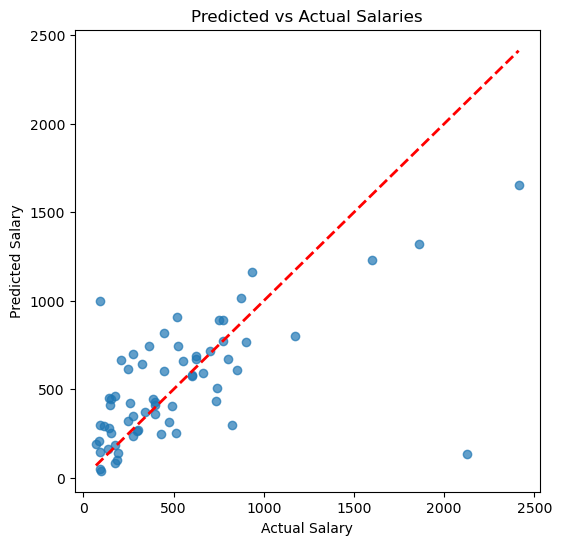

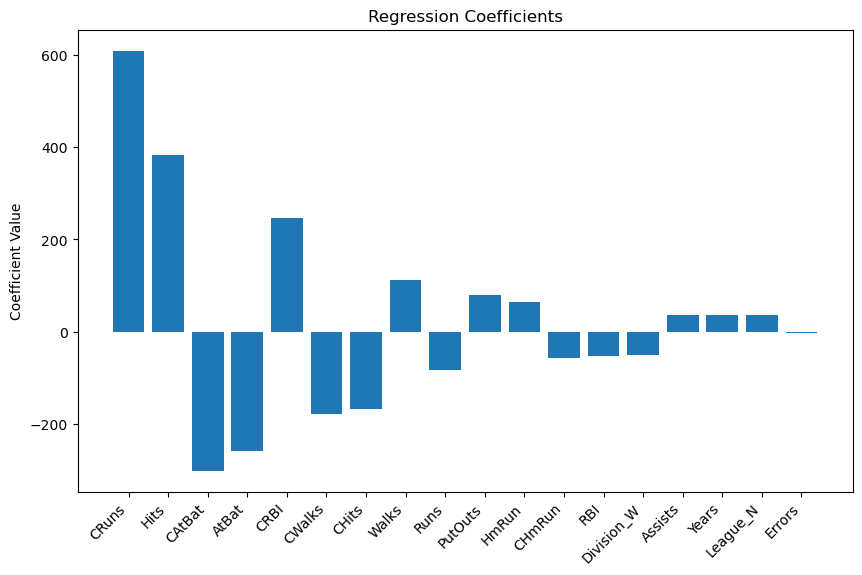

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1️⃣ Create and fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 2️⃣ Predict on the test set
y_pred = model.predict(X_test_scaled)

# 3️⃣ Compute R^2 on the test set
r2_test = model.score(X_test_scaled, y_test)
print(f"Test set R^2: {r2_test:.3f}")

# 4️⃣ Scatter plot: predicted vs actual salaries
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predicted vs Actual Salaries')
plt.show()

# 5️⃣ Bar plot: regression coefficients
coef_df = pd.DataFrame({
    'Predictor': X_train_scaled.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
plt.bar(coef_df['Predictor'], coef_df['Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Coefficient Value')
plt.title('Regression Coefficients')
plt.show()


Discuss your results here.  What do you think are the most important predictors.  What does it mean if the $\beta$ is positive versus negative.  

The most important predictors are CRuns, Hits, CAtBat, AtBat, and CRBI because they vary the most from 0. The magnitude of the variables makes the more important. If the coeeficients are positive that means that the higher that coefficient is, the higher their salary. There is a positive relationship between the coefficent and the salary. If the coefficient is negative, there is a negative relationship between the coefficient and the salary so when the coefficient goes up, the salary goes down.

5.  Fit a model using Ridge Regression with cross validation.
* The `RidgeCV()` function has an $\alpha$ argument that is $\lambda$ from the lecture notes used to tune the model.
* `RidgeCV()` requires a range of value of $\alpha$ to be specified. The selected $\alpha$ will make use of cross-validation.  
* $\alpha$  = 0 is equivalent to the Least Squares solution, but it is not recommended to you actually set $\alpha$ = 0 so avoid that.  
* We expect the coefficient estimates to be much smaller, in terms of $L_2$ norm, when a large value of $\alpha$ is used,
* A very large $\alpha$ has tiny coefficients and and the model is dominated by the intercept. 
* By default `RidgeCV()` performs generalized cross-validation(essentially Leave one-out CV),
* This can be changed using the argument `cv`.

        alphas = 10**np.linspace(5,-5,20)
        ridgecv = RidgeCV(alphas = alphas,cv = 5) # 5-fold cross validation
* the best value of alpha (over the range tested) is in `ridgecv.alpha_`
* Evaluate the model by predicting the test data  

Make a scatter plot of the predicted salaries versus the actual salaries. Make a bar graph of the weights on the coefficients. 


Best alpha: 233.57214690901236
Ridge Regression Test R^2: 0.306


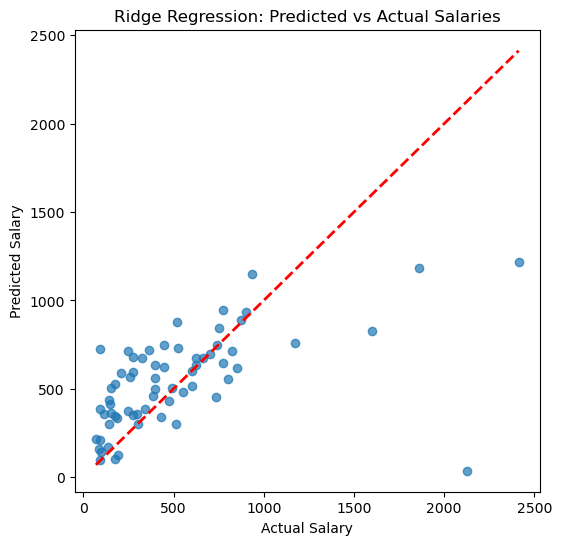

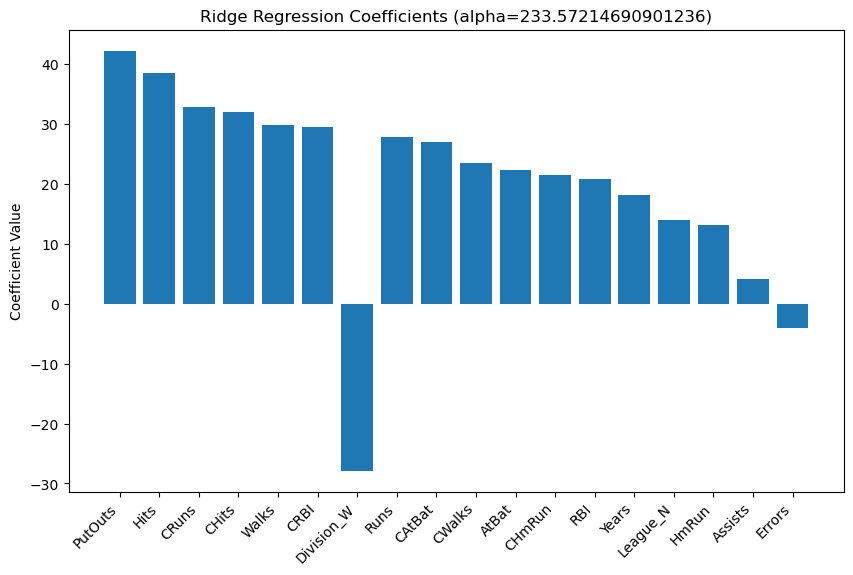

In [18]:
from sklearn.linear_model import RidgeCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Define a range of alphas (lambda values)
alphas = 10**np.linspace(5, -5, 20)  # 20 values from 1e5 to 1e-5

# 2️⃣ Create RidgeCV model with 5-fold cross-validation
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='r2')  # R^2 is used to select best alpha

# 3️⃣ Fit RidgeCV on the training data
ridgecv.fit(X_train_scaled, y_train)

# 4️⃣ Best alpha selected by cross-validation
print("Best alpha:", ridgecv.alpha_)

# 5️⃣ Predict on the test set
y_pred_ridge = ridgecv.predict(X_test_scaled)

# 6️⃣ Evaluate test set R^2
r2_test_ridge = ridgecv.score(X_test_scaled, y_test)
print(f"Ridge Regression Test R^2: {r2_test_ridge:.3f}")

# 7️⃣ Plot predicted vs actual salaries
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression: Predicted vs Actual Salaries')
plt.show()

# 8️⃣ Plot Ridge coefficients
coef_df_ridge = pd.DataFrame({
    'Predictor': X_train_scaled.columns,
    'Coefficient': ridgecv.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
plt.bar(coef_df_ridge['Predictor'], coef_df_ridge['Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Coefficient Value')
plt.title(f'Ridge Regression Coefficients (alpha={ridgecv.alpha_})')
plt.show()


5.  Fit a model using LASSO Regression with cross validation. Use `LassoCV` with the same range of alpha values.  (This is not strictly required.  Typically you should test more small values of alpha) Make a scatter plot of the predicted and actual values of salary.  Make a bar graph of the Lasso coefficients (some of them are zero)

Best alpha for Lasso: 5.1794746792312125
Lasso Regression Test R^2: 0.341


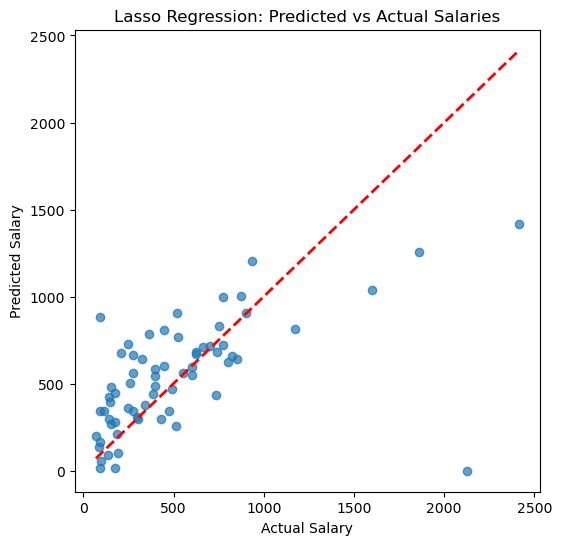

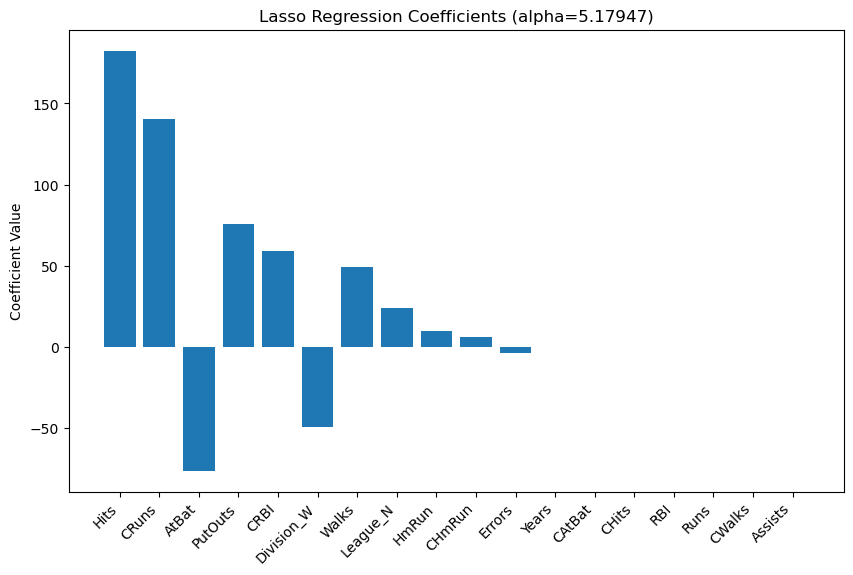

In [19]:
from sklearn.linear_model import LassoCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Define the range of alphas
alphas = 10**np.linspace(5, -5, 50)  # Using more small values helps Lasso fine-tune

# 2️⃣ Create LassoCV model with 5-fold cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)

# 3️⃣ Fit LassoCV on the training data
lasso_cv.fit(X_train_scaled, y_train)

# 4️⃣ Best alpha selected by cross-validation
print("Best alpha for Lasso:", lasso_cv.alpha_)

# 5️⃣ Predict on the test set
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# 6️⃣ Evaluate test set R^2
r2_test_lasso = lasso_cv.score(X_test_scaled, y_test)
print(f"Lasso Regression Test R^2: {r2_test_lasso:.3f}")

# 7️⃣ Scatter plot: predicted vs actual salaries
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Lasso Regression: Predicted vs Actual Salaries')
plt.show()

# 8️⃣ Bar plot: Lasso coefficients
coef_df_lasso = pd.DataFrame({
    'Predictor': X_train_scaled.columns,
    'Coefficient': lasso_cv.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
plt.bar(coef_df_lasso['Predictor'], coef_df_lasso['Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Coefficient Value')
plt.title(f'Lasso Regression Coefficients (alpha={lasso_cv.alpha_:.5f})')
plt.show()


6. I would like you to summarizethe results of this analysis, focusing on comparing Ridge and Lasso. 
    - How did they perform in prediction? is there a big difference?
    - What are the similarities in the pattern of coefficients selected? 
    - What are the differences? 
    - Does the correlation between the predictors have an effect on the two models?
    - Are there any surprising results in either model? 
    - Which model is easier to talk about?  
    - Is East Coast bias real? 

- Lasso preforms slightly better than the Ridge test with an R^2 of .341 and Ridge with a R^2 of .306.
- Both Ridge and Lasso had Hits and Career Runs as a highly correlated coefficients. These are strong predictors of salary.
- Lasso shrinks its coefficients to zero so it seems like they disappear and Ridge puts more weight on more coefficients. Also, most of Ridge's coefficients are positively correlated while Lasso has more of a variety. 
- Yes, the correlation between preictors does have an effect on the model since ridge doesn't zero out any coefficients, it spreads the weight across the coefficients. Lasso puts the majority of the weight on a few vsriables and zeros the rest of them out making those variables hold more weight.
- Yes, Lasso makes a few variables that seem important such as years and Runs and zeros them out. Division and League also have very small coefficients which is surprising.
- Lasso is easier to talk about because there are less variables for salary to depend on
- Since League and Division play such small roles in the Lasso analysis, there is not much East coast bias. Even though Division_W is only negatively correlated value in the Ridge data, Lasso keeps this variable, but it is such a small value that doesn't make the east coast bias real.